---

### What is PCA?

PCA (Principal Component Analysis) is a **dimensionality reduction** technique. It helps:
- Reduce the number of features (columns) in the data
- Keep the most important patterns
- Remove noise and redundancy
- Speed up training and improve model generalization

---

###  Why do we use PCA in ML?

In machine learning, especially when we have many features (high-dimensional data), some of them may:
- Be **correlated** (carry duplicate information)
- Contribute **noise** rather than meaningful signal

PCA helps by:
1. Reducing dimensionality
2. Keeping most of the information
3. Improving model efficiency and performance

---

###  How PCA works (Step-by-step)

Imagine the dataset is a cloud of points in multi-dimensional space (each feature is one axis).

#### 🔹 Step 1: **Standardize the Data**
Before PCA is applied, the data is scaled (e.g., using `StandardScaler`) so that each feature has a mean of 0 and a standard deviation of 1.

#### 🔹 Step 2: **Compute the Covariance Matrix**
It captures how features vary together:
- Positive = move in the same direction
- Negative = move in opposite directions
- Zero = independent

#### 🔹 Step 3: **Compute Eigenvalues and Eigenvectors**
From the covariance matrix:
- **Eigenvectors** are the "directions" (principal components)
- **Eigenvalues** tell us how much **variance (information)** is in each direction

We rank the eigenvectors by eigenvalues (from highest to lowest variance).

#### 🔹 Step 4: **Select Top `k` Components**
You pick the top `k` eigenvectors that explain the most variance. This is where you choose `n_components`.

You can look at the **explained variance ratio** to decide how many components to keep.

```python
pca.explained_variance_ratio_
```

This shows what percentage of the total variance is explained by each component.

#### 🔹 Step 5: **Project the Data**
You transform your original data to the new axes (principal components). Now your dataset has `k` features instead of the original number.

---

### When to Use PCA
    1. You have many correlated features 
    2. You want to speed up training  
    3. You want to visualize high-dimensional data (in 2D/3D)  
    4. Avoid if features are not correlated, or interpretability is crucial (PCA transforms the features into abstract components)

---

### 1. KNN Classifier Performance Before and After PCA

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

df = pd.read_csv('winequality.csv')

df.head()

df.drop_duplicates(inplace=True)

df = df.dropna()

# Split the features and target variable
X = df.iloc[:,1:]
y = df.iloc[:,0]

# Alternate
# X = df.drop('type', axis=1)
# y =df['type']

X_train, X_test, y_train, y_test = train_test_split(X , y,test_size= 0.2, random_state=41, )

# Scaled
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Without PCA
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy without PCA: ',accuracy_score(y_test, y_pred),' (bases on 12 features)')

# PCA
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


# KNN with PCA
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_score(y_test, y_pred_pca)
print('Accuracy using PCA: ',accuracy_score(y_test, y_pred_pca),' (bases on 5 features)')


Accuracy without PCA:  0.9915014164305949  (bases on 12 features)
Accuracy using PCA:  0.987724268177526  (bases on 5 features)


### 2. Code to Optimize n_components for PCA in Supervised Learning (e.g., KNN, SVM)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv('winequality.csv')
# Drop duplicate values
df.drop_duplicates(inplace=True)
# Drop missing values
df = df.dropna()

# Split the dataset
X = df.drop('type', axis=1)
y = df['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 41)

# Scale the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_text = scaler.transform(X_test)

# Try different n_components from 1 to the number of features
n_features = X.shape[1]
accuracies = []

for i in range ( 1, n_features+1):
    # PCA
    pca = PCA(n_components=i)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_text)
    
    # KNN
    knn = KNeighborsClassifier(n_neighbors= 5)
    knn.fit(X_train_pca, y_train)
    y_pred = knn.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    
best_n = accuracies.index(max(accuracies)) + 1
print(f"Best n_components: {best_n} with Accuracy: {max(accuracies):.4f}")

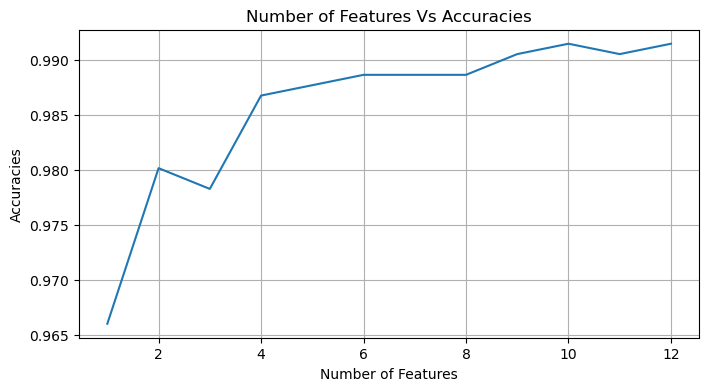

In [61]:
plt.figure(figsize=(8,4))
plt.plot(range(1, n_features+1), accuracies)
plt.xlabel('Number of Features')
plt.ylabel('Accuracies')
plt.title('Number of Features Vs Accuracies')
plt.grid()
plt.show()

### 3. Code to Find Optimal n_components for PCA (Visualization/Unsupervised Learning)

In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv('winequality.csv')
# Drop duplicate values
df.drop_duplicates(inplace=True)
# Drop missing values
df = df.dropna()

# Split the dataset
X = df.drop('type', axis=1)
y = df['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 41)

# Scale the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_text = scaler.transform(X_test)

# PCA
pca = PCA().fit(X_train)

In [72]:
print('Explained Variance Ratio: \n', pca.explained_variance_ratio_)
print('\nCumulative sum of Explained Variance Ratio: \n', np.cumsum(pca.explained_variance_ratio_))

Explained Variance Ratio: 
 [0.25019397 0.21968476 0.13975906 0.08830495 0.07117868 0.05502875
 0.04622452 0.04291763 0.03933448 0.02552144 0.01888093 0.00297085]

Cumulative sum of Explained Variance Ratio: 
 [0.25019397 0.46987873 0.60963779 0.69794273 0.76912141 0.82415016
 0.87037468 0.9132923  0.95262678 0.97814822 0.99702915 1.        ]


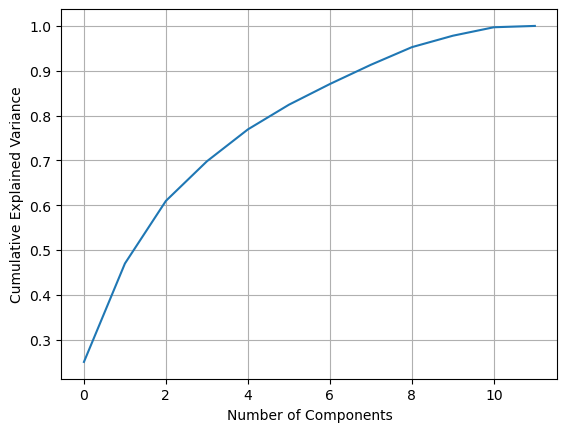

In [74]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()